# Advertising Dataset

In [33]:
import numpy as np
import pandas as pd

In [34]:
advertising_data = pd.read_csv("advertising.csv")
advertising_data.columns =["TV", "Radio", "Newspaper", "Sales"]

In [35]:
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Create x and y points

In [36]:
xs = advertising_data["TV"].tolist()
rs = advertising_data["Radio"].tolist()
ns = advertising_data["Newspaper"].tolist()
ys = advertising_data["Sales"].tolist()

## Scatter Plot 

In [37]:
import matplotlib.pyplot as plt

def show_scatter_plot(title, x_label, y_label, x_values, y_values):
    """
    @param title the chart title.
    @param x_label the x-axis label.
    @param y_label the y-axis label.
    @param x_values the independent x values to plot.
    @param y_values the dependent y values to plot.
    """
    plt.scatter(x_values, y_values)
    plt.title(title)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.show()

<h2>Scatter Plot for TV and SALES</h2>

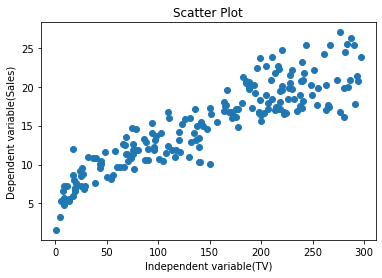

In [38]:
show_scatter_plot('Scatter Plot', 'Dependent variable(Sales)', 
                  'Independent variable(TV)', xs, ys)
# Using x for Sales and y for TV 
# Sales is a dependent variable because the value of TV is dependent on Sales
# TV is a independent variable 

<h2>Scatter Plot for Radio and SALES</h2>

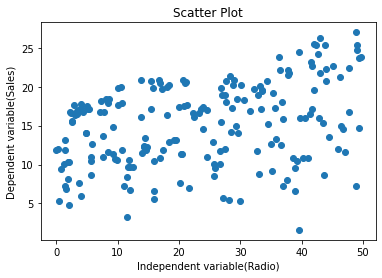

In [39]:
show_scatter_plot('Scatter Plot', 'Dependent variable(Sales)', 
                  'Independent variable(Radio)', rs, ys)
# Using x for Sales and y for Radio 
# Sales is a dependent variable because the value of Radio is dependent on Sales
# Radio is a independent variable 

<h2>Scatter Plot for Newspaper and SALES</h2>

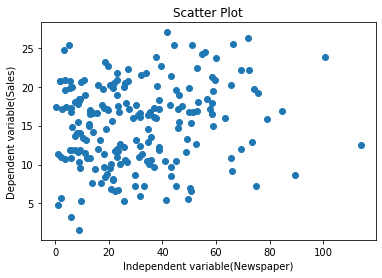

In [40]:
show_scatter_plot('Scatter Plot', 'Dependent variable(Sales)', 
                  'Independent variable(Newspaper)', ns, ys)
# Using x for Sales and y for Newspaper 
# Sales is a dependent variable because the value of Newspaper is dependent on Sales
# Newspaper is a independent variable 

## Regression Line for TV and Sales


In [41]:
import numpy as np

def calculate_slope_intercept(x_values, y_values):
    """
    Calculate the slope and intercept of a regression line.
    @param x_values the independent x values.
    @param y_values the dependent y values.
    @return a list of the slope and y-intercept of the line.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    return m, b  # slope and intercept

In [42]:
import matplotlib.pyplot as plt

def show_least_squares_line(title, x_label, y_label, 
                            x_values, y_values):
    """
    @param title the chart title.
    @param x_label the x-axis label.
    @param y_label the y-axis label.
    @param x_values the independent x values to plot.
    @param y_values the dependent y values to plot.
    """
    # First show the scatter plot.
    plt.scatter(x_values, y_values)
    
    # Now show the least squares line.
    m, b = calculate_slope_intercept(x_values, y_values)
    reg_line = [m*x + b for x in x_values]  # regression line
    plt.plot(xs, reg_line, color='red')

    plt.title(f'{title}, m = {m:.2f}, b = {b:.2f}')
    plt.ylabel(x_label)
    plt.xlabel(y_label)

    plt.show()

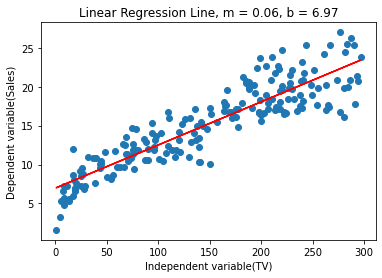

In [43]:
show_least_squares_line('Linear Regression Line', 'Dependent variable(Sales)', 
                  'Independent variable(TV)', xs, ys )

## Calculate the Coefficent of Determination


In [44]:
import numpy as np

def calculate_ss(x_values, y_values):
    """
    Calculate the residual and total sums of squares.
    @param x_values the independent x values.
    @param y_values the dependent y values.
    @return a list of the residual and total sums of squares.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_yy = np.sum(y*y)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    ss_residual = sum_yy - b*sum_y - m*sum_xy
    ss_total    = sum_yy - (sum_y*sum_y)/n
    
    return ss_residual, ss_total

In [45]:
def calculate_r2(ss_residual, ss_total):
    """
    Calculate the coefficient of determination.
    @param ss_residual the residual sum of squares.
    @param ss_total the total sum of squares.
    @return the coefficient of determination.
    """
    cofd = 1 - ss_residual/ss_total
    return cofd

In [46]:
ss_residual, ss_total = calculate_ss(xs, ys)

print(f'ss_residual = {ss_residual:8.5f}')
print(f'ss_total    = {ss_total:8.5f}')

ss_residual = 1043.54878
ss_total    = 5555.98395


In [47]:
r2 = calculate_r2(ss_residual, ss_total)

print(f'coefficient of determination = {r2:.3f}')

coefficient of determination = 0.812


## Calculate the Correlation Coefficient 

In [48]:
import math
import numpy as np

def calculate_r(x_values, y_values):
    """
    Calculate the correlation coefficient.
    @param x_values the x values.
    @param y_values the y values.
    @return the correlation coefficient.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_yy = np.sum(y*y)
    sum_xy = np.sum(x*y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = math.sqrt(sum_xx - (sum_x*sum_x)/n)*math.sqrt(sum_yy - (sum_y*sum_y)/n)
    
    r = numerator/denominator
    return r

In [49]:
r = calculate_r(xs, ys)

print(f'r = {r:.3f}')
print("This shows a very strong relationship, r is close to +1")

r = 0.901
This shows a very strong relationship, r is close to +1


## Report

### We showed 3 scatter plots showing how Sales is dependent on TV, Radio, and Newspaper. Also, showed the regression line for the TV and sales. The correlation coefficient accurately reflects the strength of the relationship for TV and Sales as strong, by looking at the regression line and the correlation coefficient this shows that this is a very strong realtionship. The correlation coefficent came out to .901, so this would be considered a very strong linear relationship. The values of Sales (y) are caused by the values of TV (x). For this scenario there is no third party involvement,the sales due to TV are not influenced by sales due to Radio or Newspapers.Hence it is a direct relationship uninfluenced by any third part element here.(we showed scatter plots to demonstrate how the sales are scattered for different mediums(TV,Radio and Newspaper).If we observe,we can see that TV had the most plots in a linear way but for the Radio and Newspaper are scattered around the graph